# "Main question here"

Greenhouse Gas Emissions 

Hareem Nadeem (z54425310)

`imports`

In [1]:
import os
import geopandas
import plotly.graph_objects as go
import matplotlib
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import json
import pandas as pd # data processing (CSV file - e.g. pd.read_csv)
from datetime import datetime


In [2]:
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = (50, 30)

In [4]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

In [5]:
#Loading my data (excel spreadsheet)
if os.path.isfile("ghg_data.csv"):
    filepath = "ghg_data.csv"
    print("loading from file")
else:
    filepath = "https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1087005/uk-local-authority-ghg-emissions-2020-dataset.csv"
    print("loading from the internet")

gd = pd.read_csv(filepath)
print("done")

loading from file
done


START HERE

In [6]:
gd.head(10)

,Country,Country Code,Region,Region Code,Second Tier Authority,Local Authority,Local Authority Code,Calendar Year,LA GHG Sector,LA GHG Sub-sector,Greenhouse gas,Territorial emissions (kt CO2e),CO2 emissions within the scope of influence of LAs (kt CO2e),Mid-year Population (thousands),Area (km2)
0,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Electricity,CH4,0.010737,0.000000,236.47,78.0311
1,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Electricity,CO2,0.380289,0.380289,236.47,78.0311
2,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Electricity,N2O,0.001710,0.000000,236.47,78.0311
3,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Gas,CH4,0.021121,0.000000,236.47,78.0311
4,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Gas,CO2,0.700438,0.700438,236.47,78.0311
5,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Gas,N2O,0.000558,0.000000,236.47,78.0311
6,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture 'Other',CH4,0.003186,0.000000,236.47,78.0311
7,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture 'Other',CO2,0.792025,0.792025,236.47,78.0311
8,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture 'Other',N2O,0.009533,0.000000,236.47,78.0311
9,England,E92000001,East Midlands,E12000004,Derby,Derby,E06000015,2005,Agriculture,Agriculture Soils,CO2,0.125285,0.000000,236.47,78.0311


Country & Region

Greenhouse Gas 

Greenhouse Gases:
N22
CH4
CO2

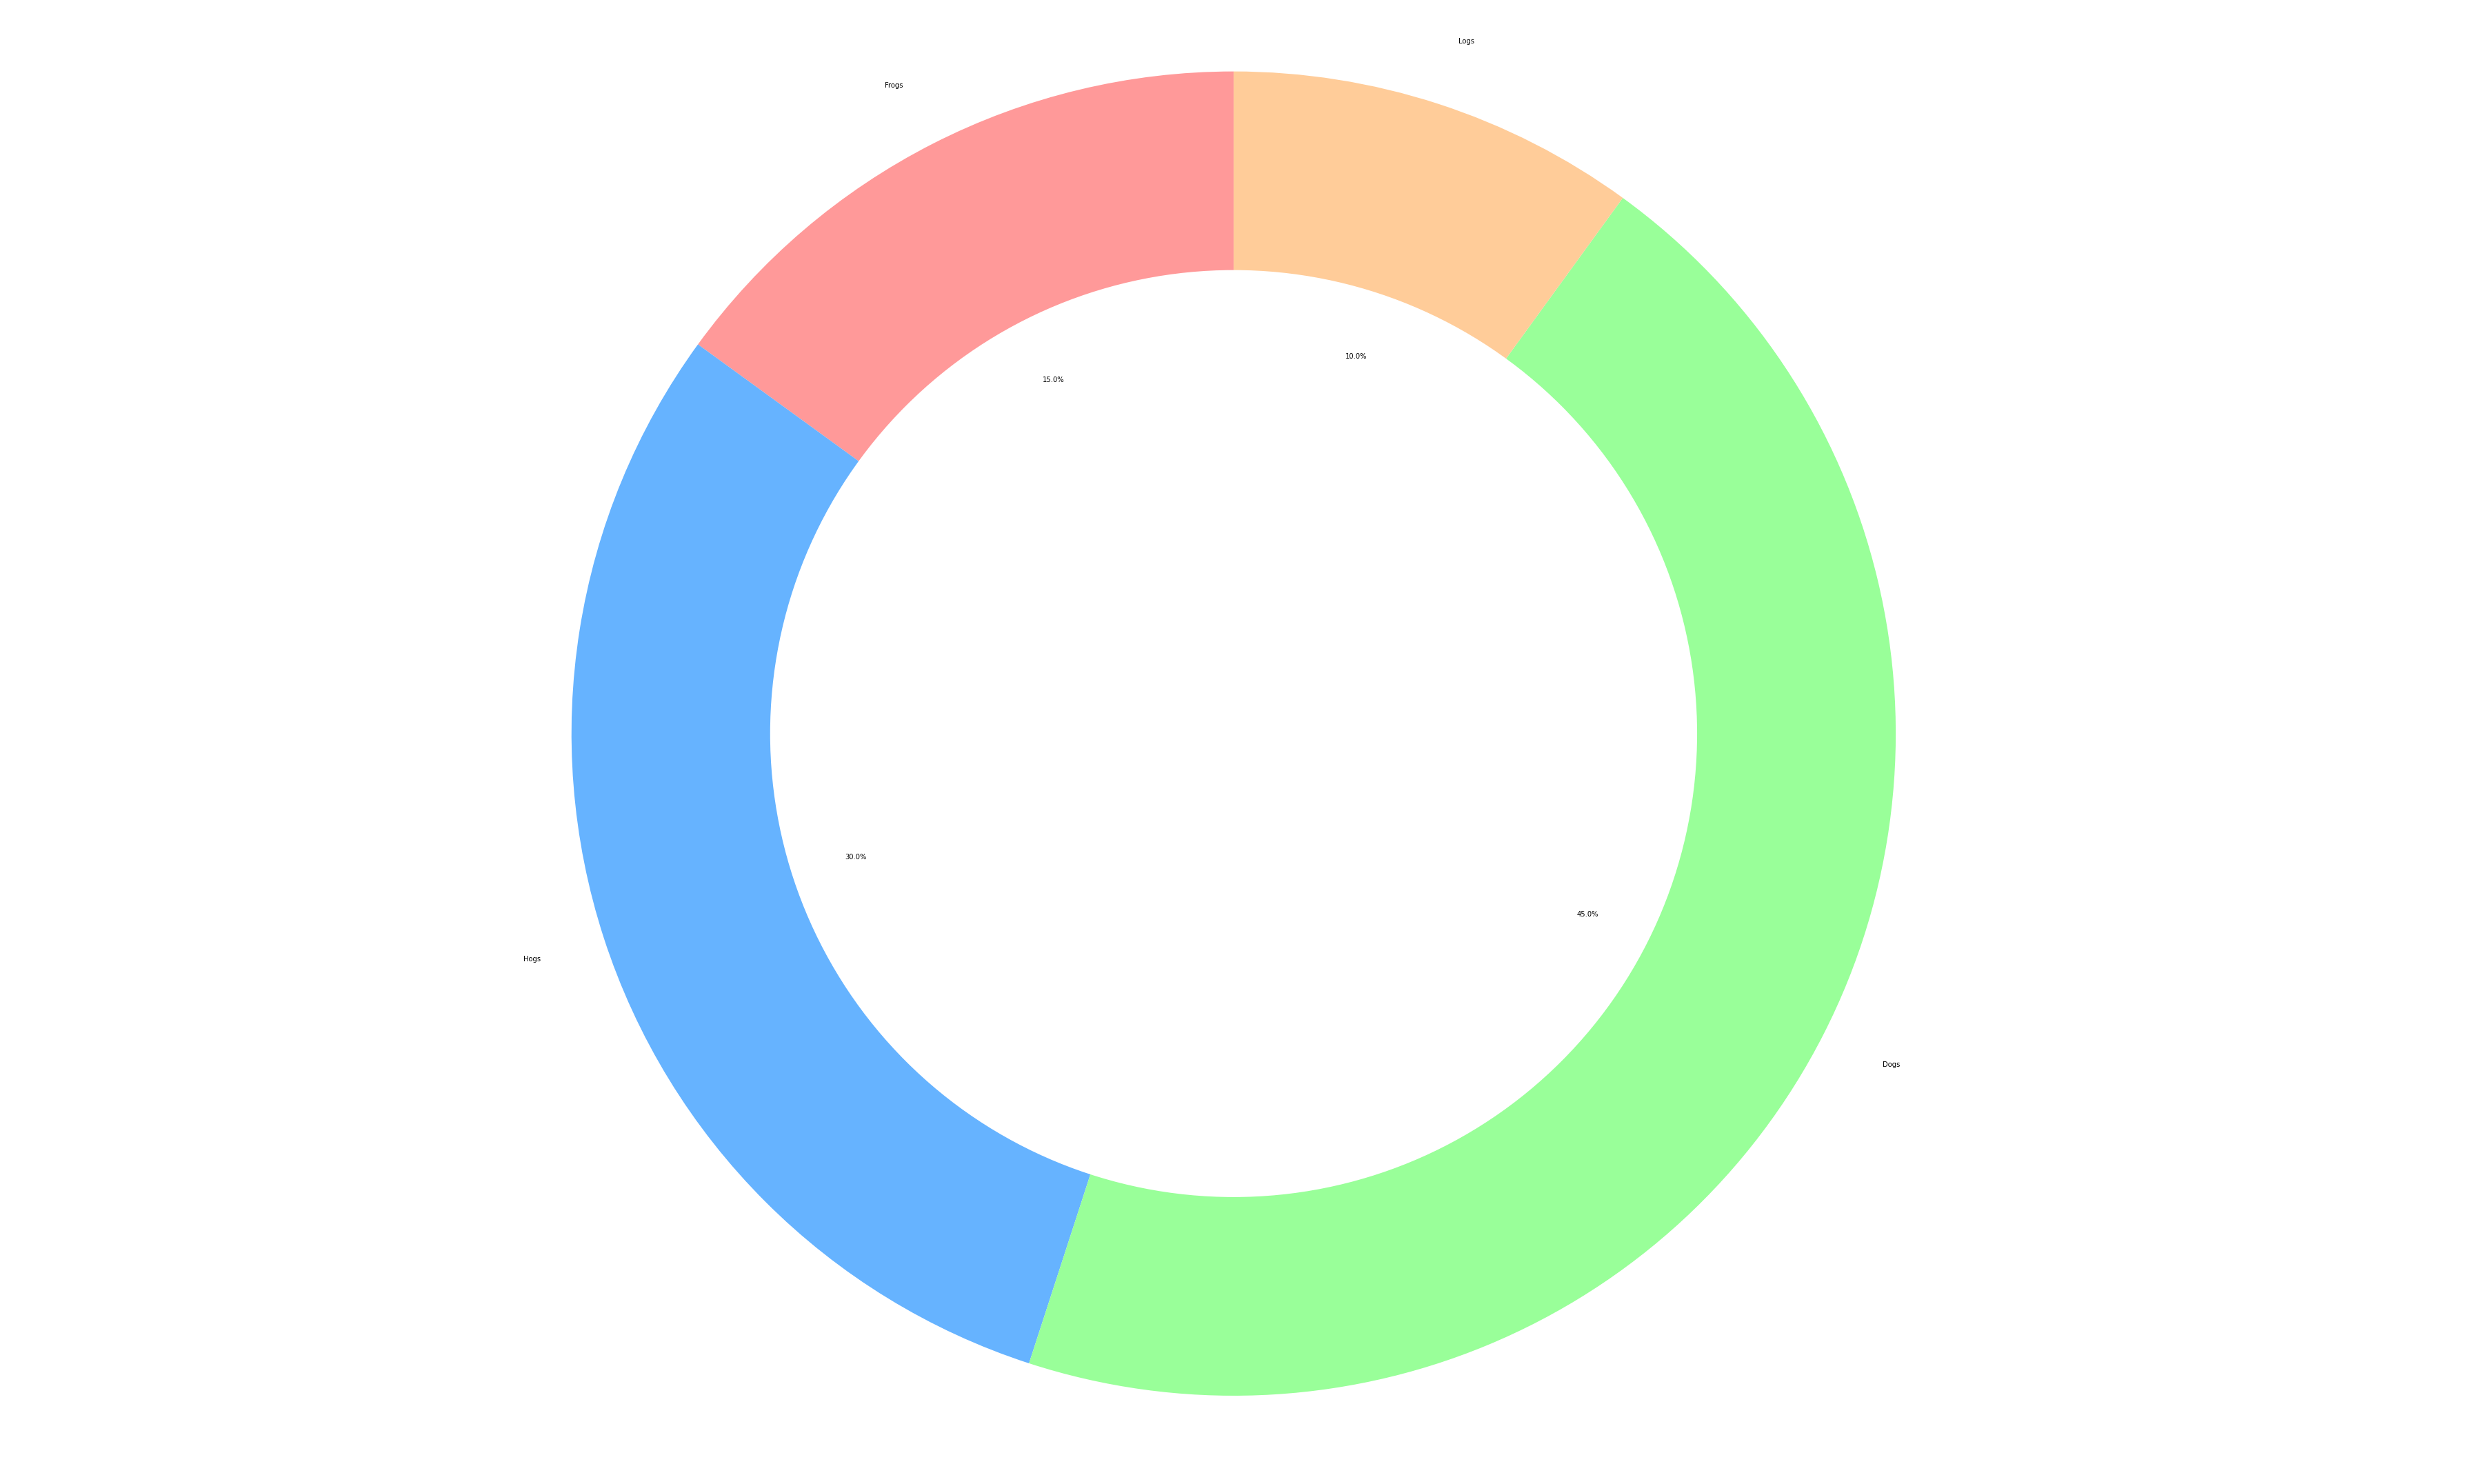

In [7]:
labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
sizes = [15, 30, 45, 10]
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

C02 EMISSIONS

<AxesSubplot:>

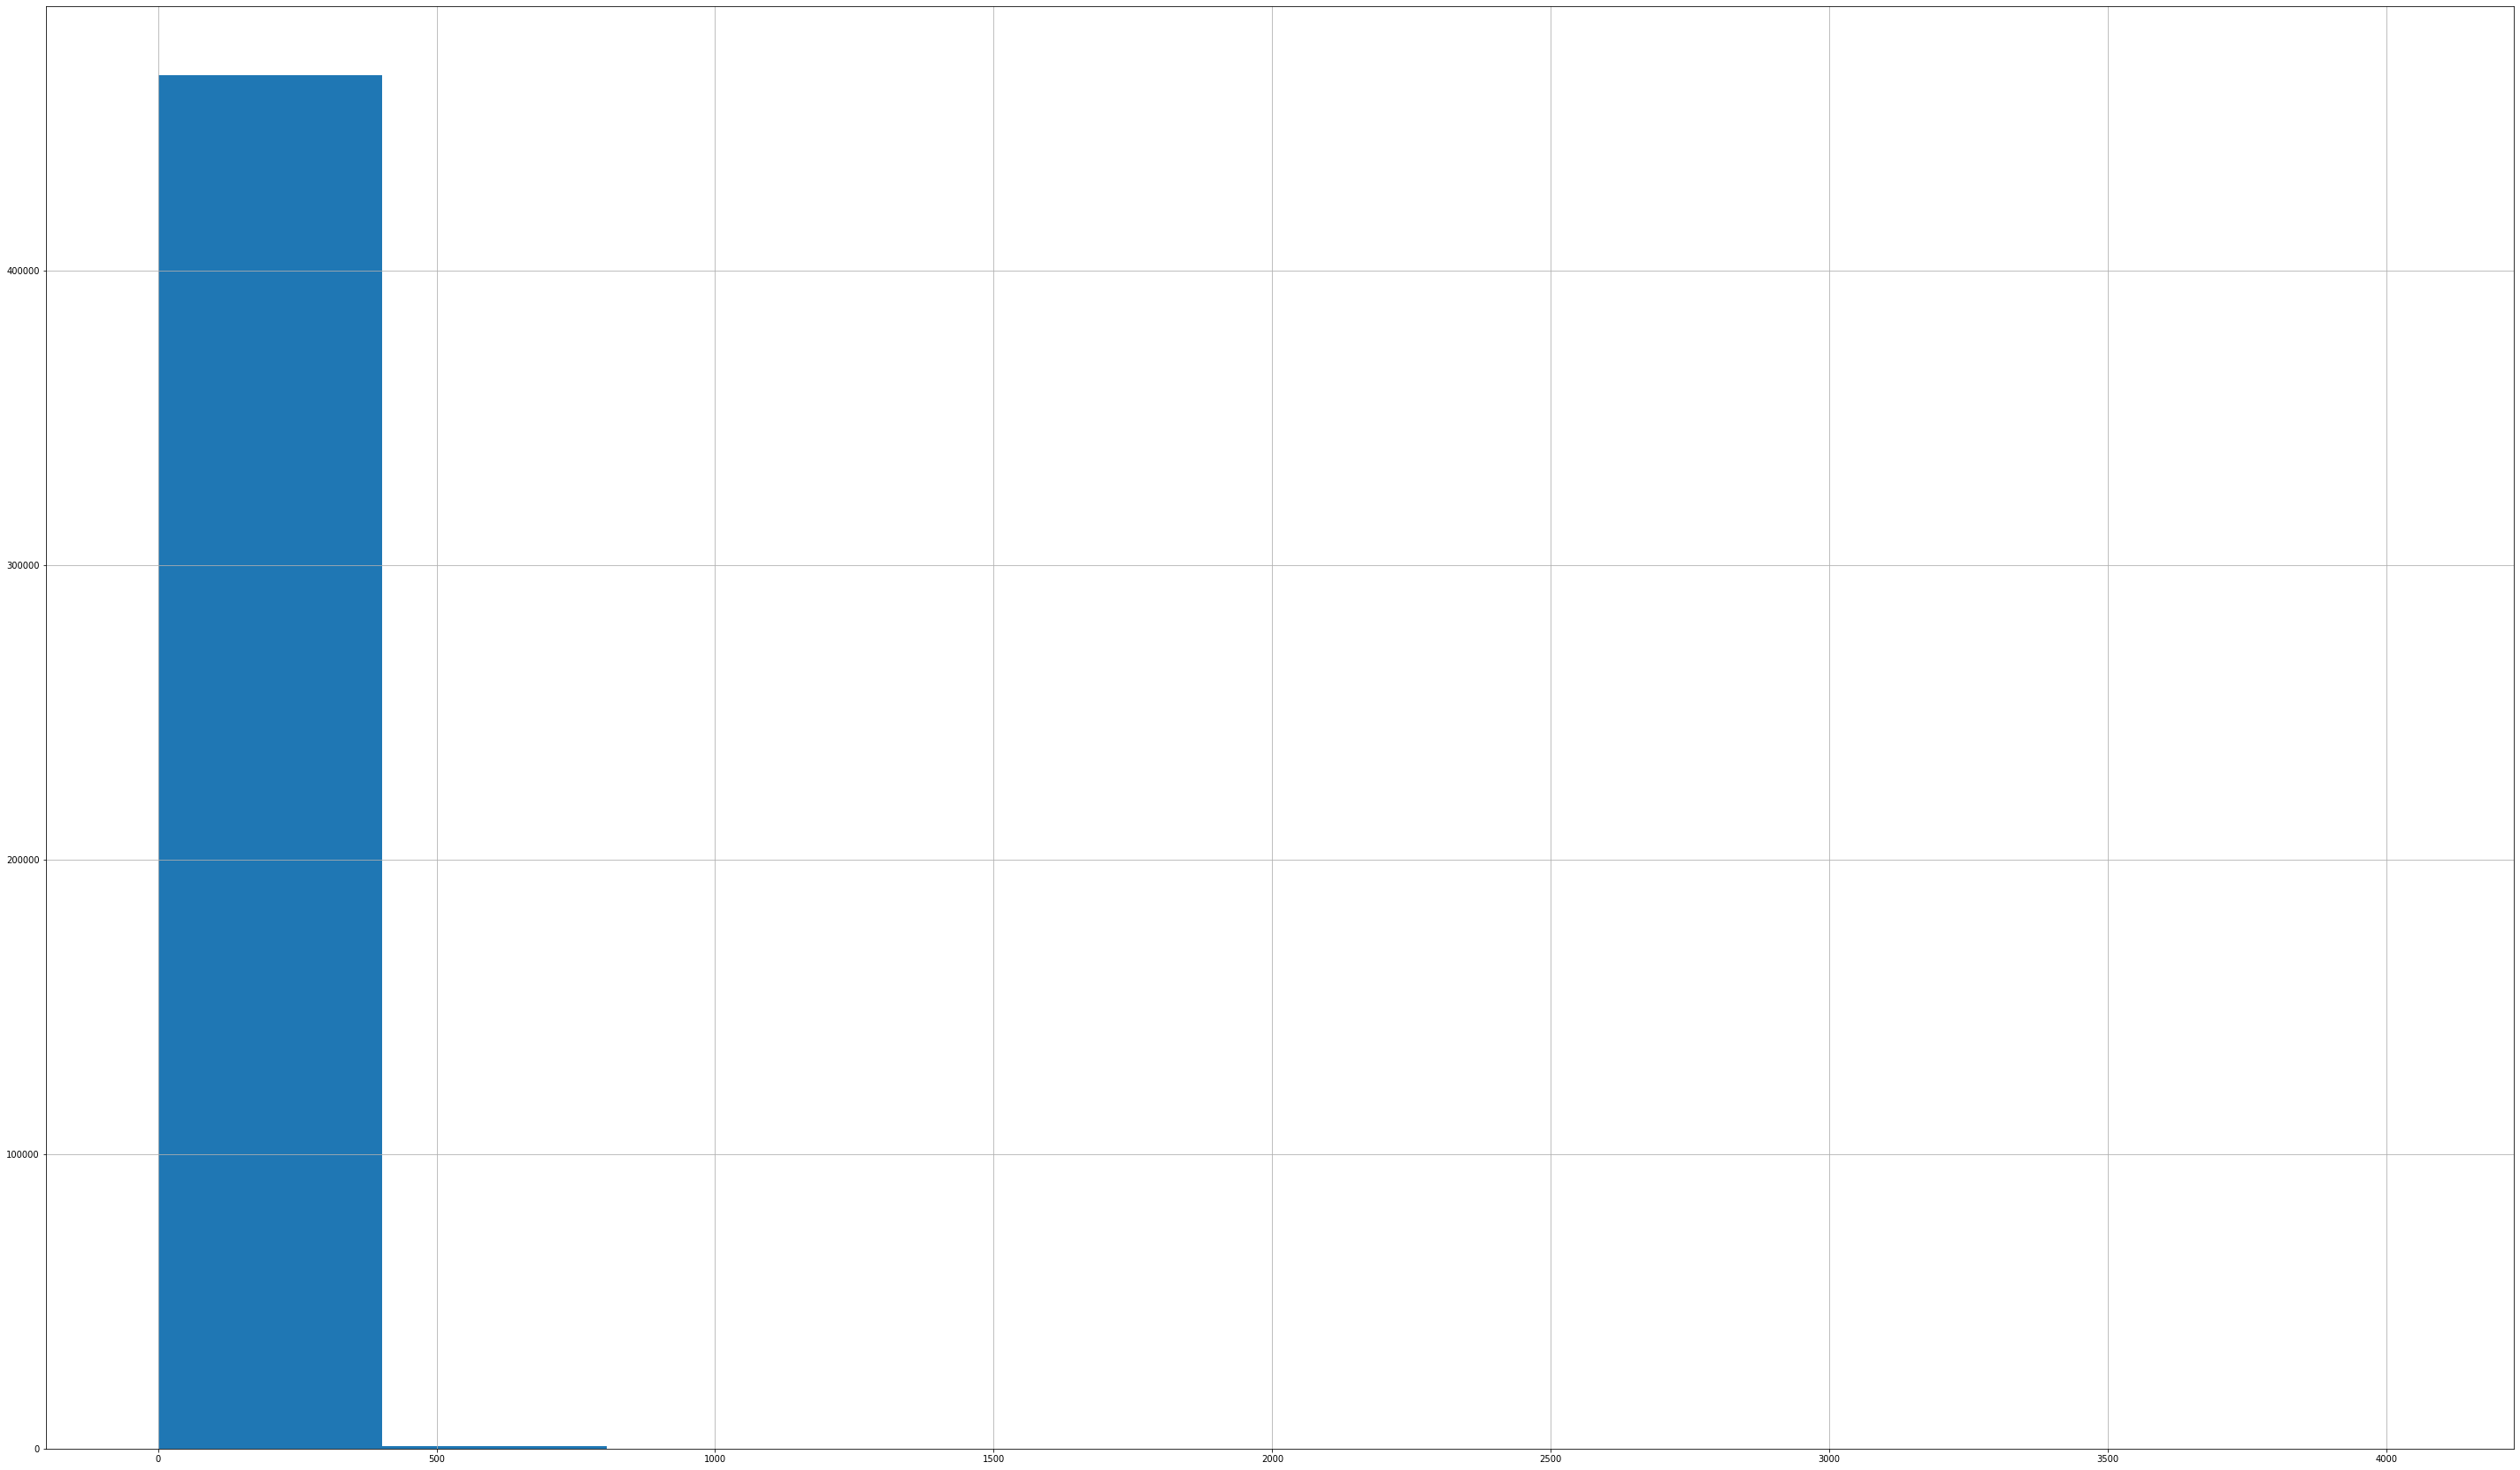

In [10]:

gd["CO2 emissions within the scope of influence of LAs (kt CO2e)"].hist()


<AxesSubplot:>

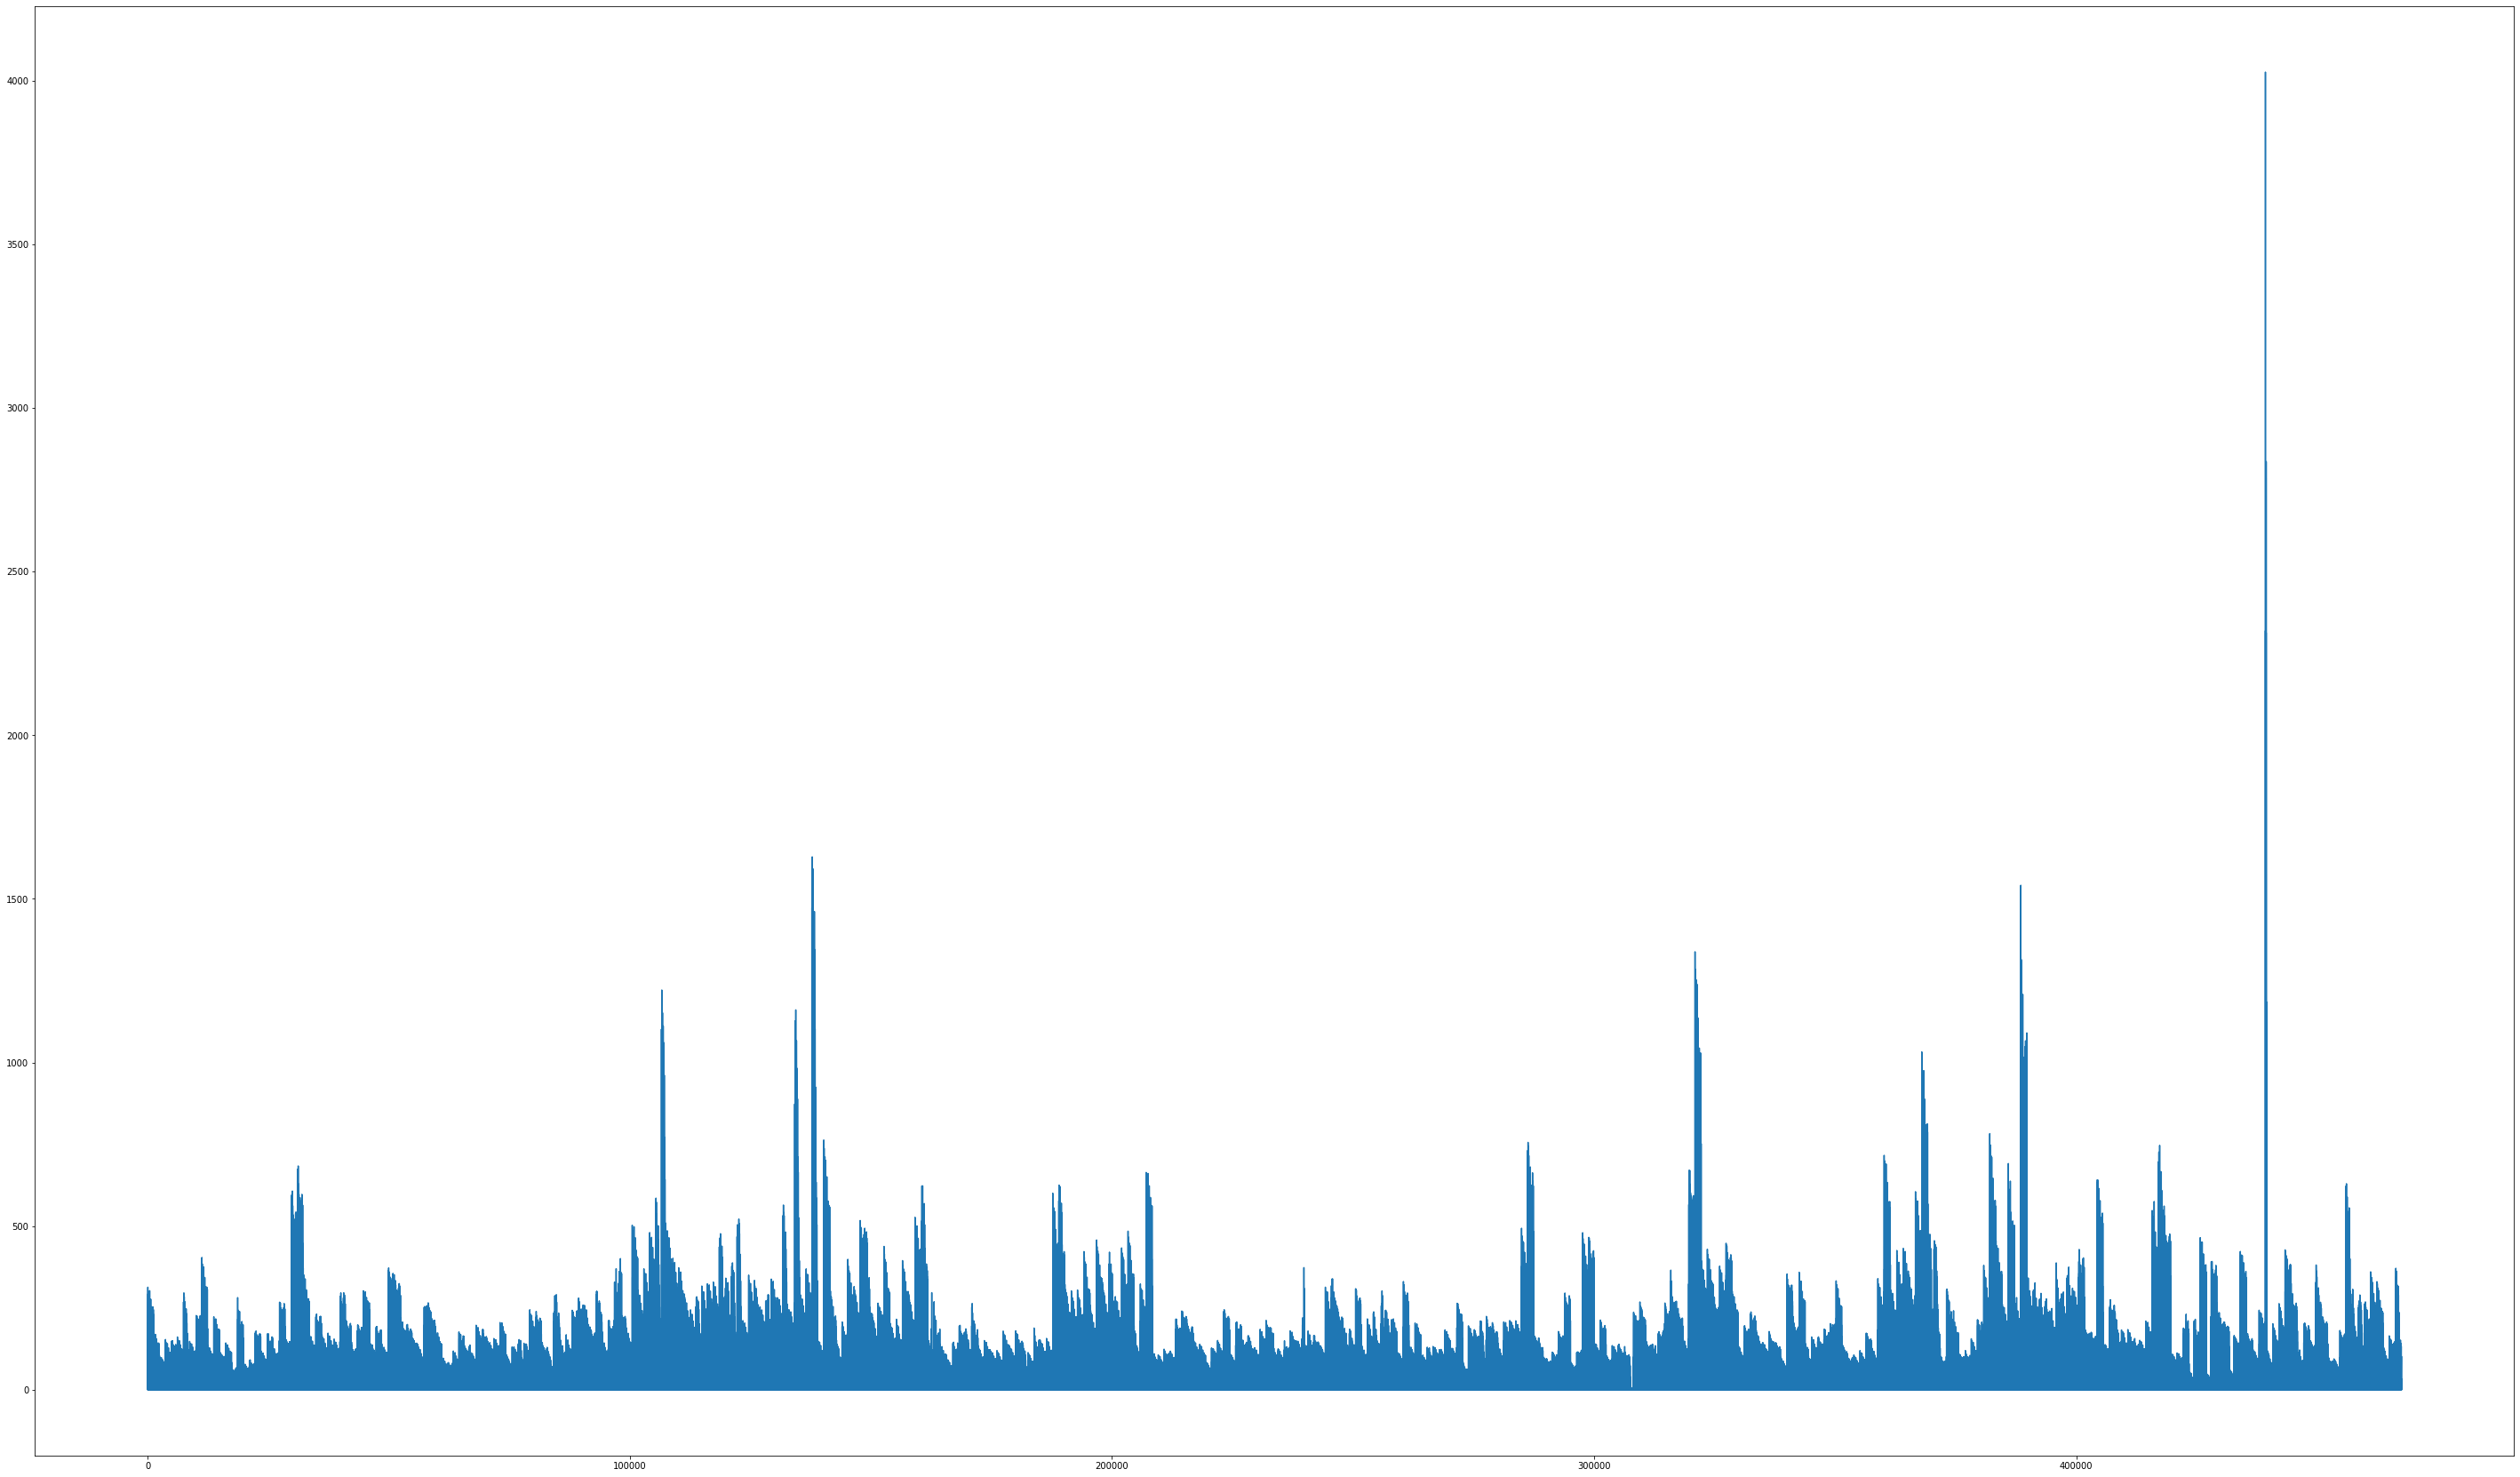

In [11]:
gd["CO2 emissions within the scope of influence of LAs (kt CO2e)"].plot()
